# M12 Seminar: Economic and Social Problems: Insights from Big Data.
# Term Paper. 
# Replication file №1 - initial hotspot analysis (heatmaps)

### Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import geopandas as gpd
from shapely.geometry import Point, Polygon
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')

### Load data (files can be found [here](https://github.com/social-connectedness-index/example-scripts))

In [2]:
us_sci_covariates = pd.read_csv('covid19_exploration/_intermediate/westchester_sci_covariates.csv', 
                                encoding='cp1251')
# sort values by SCI value
us_sci_covariates = us_sci_covariates.sort_values(by='sci', ascending=False).reset_index(drop=True)
# take logs of SCI
us_sci_covariates['log_sci'] = np.log(us_sci_covariates['sci'])
# drop Alaska and Hawaii
us_sci_covariates = us_sci_covariates.loc[(us_sci_covariates['state']!='Hawaii') & 
                                          (us_sci_covariates['state']!='Alaska')].reset_index(drop=True)

In [3]:
# load global map in Shape format
global_map = gpd.read_file('gadm_based_shapefiles/shp_format/gadm1_nuts3_counties.shp')
# select US
us_map = global_map.loc[global_map['country']=='USA']
# select Italy
it_map = global_map.loc[global_map['country']=='ITA']
del global_map

In [4]:
# merge SCI data and a map of counties
us_sci_covariates['geometry'] = np.nan
for i in tqdm(range(us_sci_covariates.shape[0])):
    try:
        us_sci_covariates['geometry'].iloc[i] = us_map.loc[us_map.name == us_sci_covariates['label'][i]].geometry.values[0]
    except IndexError:
        # print name of a county if it can't be matched
        print(us_sci_covariates['label'][i])

District of Columbia, District of Columbia
Doсa Ana County, New Mexico



### Plotting - US

In [5]:
# construct GeoDataFrame
us_geo_df = gpd.GeoDataFrame(data=us_sci_covariates[['log_sci', 'cases_per_10k', 'geometry']])

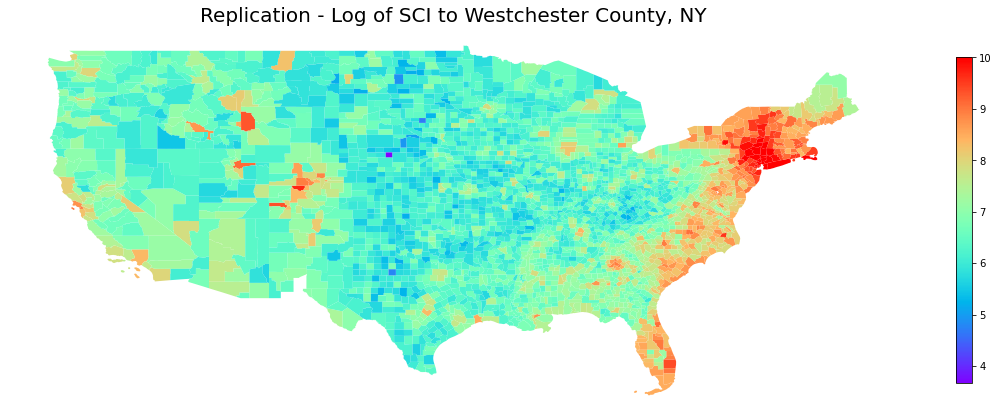

In [15]:
fig, ax = plt.subplots(figsize = (20, 20))
us_geo_df.plot(column='log_sci', 
               ax=ax, 
               cmap='rainbow',
               legend=True, 
               legend_kwds={'shrink': 0.3}, 
               markersize=10, 
               vmax=10)

plt.axis('off')
plt.title('Replication - Log of SCI to Westchester County, NY', fontsize=20)
plt.show()

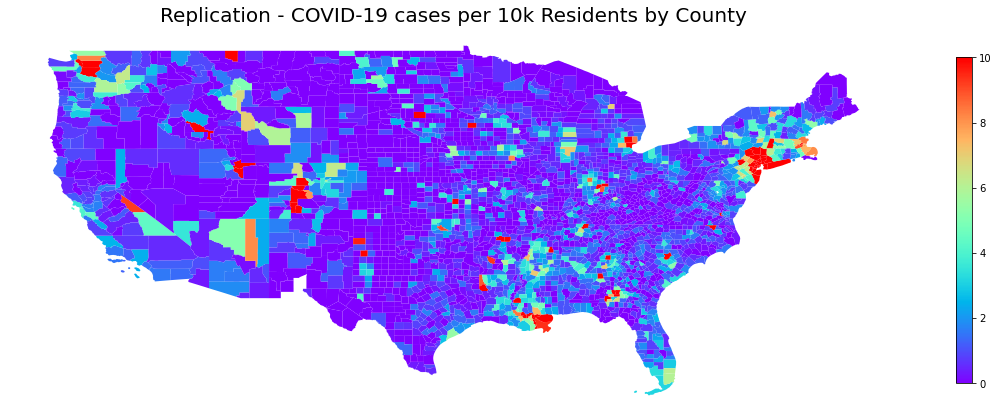

In [8]:
fig, ax = plt.subplots(figsize = (20, 20))

us_geo_df.plot(column='cases_per_10k', 
               ax=ax, 
               cmap='rainbow',
               legend=True, 
               legend_kwds={'shrink': 0.3}, 
               markersize=10, 
               vmax=10)

plt.axis('off')
plt.title('Replication - COVID-19 cases per 10k Residents by County', fontsize=20)
plt.show()

### Plotting - Italy

In [9]:
# load SCI data for Italy
it_sci_covariates = pd.read_csv('covid19_exploration/_intermediate/lodi_sci_covariates.csv', 
                                encoding='cp1251')
# sort by SCI value
it_sci_covariates = it_sci_covariates.sort_values(by='sci', ascending=False).reset_index(drop=True)
# take logs of SCI
it_sci_covariates['log_sci'] = np.log(it_sci_covariates['sci'])

In [10]:
# merge SCI data with geographical properties of provinces
it_sci_covariates['geometry'] = np.nan
for i in tqdm(range(it_sci_covariates.shape[0])):
    try:
        it_sci_covariates['geometry'].iloc[i] = it_map.loc[it_map.key == it_sci_covariates['nuts3_code'][i]].geometry.values[0]
    except IndexError:
        # print province name if it can't be matched
        print(it_sci_covariates['nuts3_code'][i])

ITG2



In [11]:
# construct geopandas GeoDataFrame for plotting
it_geo_df = gpd.GeoDataFrame(data=it_sci_covariates[['log_sci', 'cases_per_10k', 'geometry']])

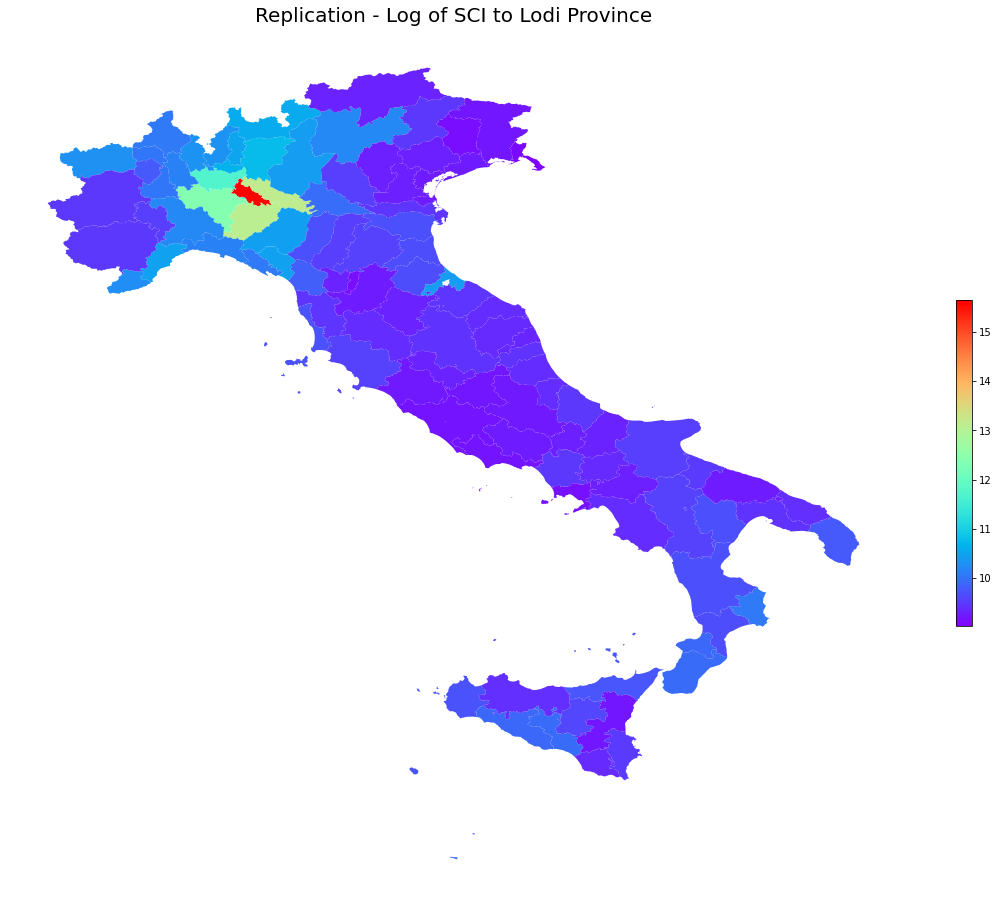

In [12]:
fig, ax = plt.subplots(figsize = (20, 20))
it_geo_df.plot(column='log_sci', 
               ax=ax, 
               cmap='rainbow',
               legend=True, 
               legend_kwds={'shrink': 0.3}, 
               markersize=10)
plt.axis('off')
plt.title('Replication - Log of SCI to Lodi Province', fontsize=20)
plt.show()

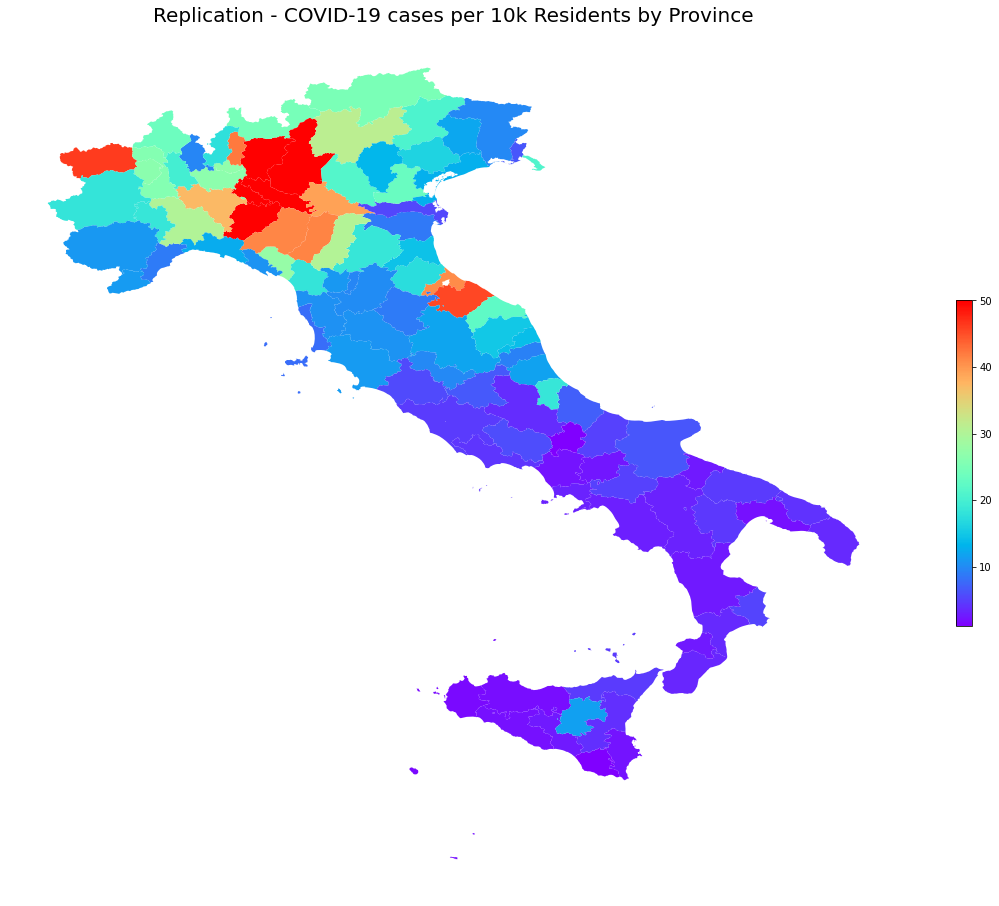

In [17]:
fig, ax = plt.subplots(figsize = (20, 20))

it_geo_df.plot(column='cases_per_10k', 
               ax=ax, 
               cmap='rainbow',
               legend=True, 
               legend_kwds={'shrink': 0.3}, 
               markersize=10, 
               vmax=50)
plt.axis('off')
plt.title('Replication - COVID-19 cases per 10k Residents by Province', fontsize=20)
plt.show()